In [ ]:
%matplotlib qt

# Finding Feature Importance (through Random Forest)

In [1]:
from ipynb.fs.full.concat_project2 import x_y_split

Using TensorFlow backend.


In [2]:
from ipynb.fs.full.extract_TESS import data_extract_tess

In [3]:
import  ipynb.fs.full.concat_project2 as emotex_lib

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.neural_network import MLPClassifier
from scipy.signal import butter, sosfiltfilt
import python_speech_features
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from ipynb.fs.full.Pitch_vector import get_pitch_stats
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
import time
import  ipynb.fs.full.concat_project2 as emotex_lib
from sklearn.model_selection import KFold
from keras.optimizers import Adadelta
from keras.layers import Conv2D
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import keras as keras
from  conch.analysis.formants import lpc
import csv

Using TensorFlow backend.


IndentationError: expected an indented block (concat_project2.ipynb, line 349)

In [ ]:
# Extracts training and test data set from concat_project
#X_train, X_test, y_train, y_test = x_y_split('../../LDC2002S28.wav')

In [ ]:
X_train_TESS, X_test_TESS, y_train_TESS, y_test_TESS = np.load("TESS_data.npy", allow_pickle = True)

In [6]:
X_train_RAV, X_test_RAV, y_train_RAV, y_test_RAV = np.load("RAVDESS_X_Y_train_test.npy", allow_pickle = True)

In [1]:
data_CREMA, fs_CREMA, y_CREMA = emotex_lib.data_extract_CREMA()

NameError: name 'emotex_lib' is not defined

In [ ]:
np.save("CREMA_data.npy", (data_CREMA, fs_CREMA, y_CREMA))

In [ ]:
data_RAV, fs_RAV, x_size = emotex_lib.data_extraction_RAVDESS('../../RAVDESS')
y_RAV = emotex_lib.emotion_extraction_RAVDESS('../../RAVDESS',x_size)
X_train_RAV, X_test_RAV, y_train_RAV, y_test_RAV = x_y_split(data_RAV, fs_RAV, y_RAV)

In [7]:
#Classifies all the feature labels
feat_labels = ['MFCC_1_Mean', 'MFCC_1_Median','MFCC_1_Var', 'MFCC_1_Min', 
               'MFCC_1_Max', 'MFCC_1_dMean','MFCC_1_dVar', 'MFCC_2_Mean',
               'MFCC_2_Median','MFCC_2_Var', 'MFCC_2_Min', 'MFCC_2_Max',
               'MFCC_2_dMean','MFCC_2_dVar', 'MFCC_3_Mean', 'MFCC_3_Median',
               'MFCC_3_Var', 'MFCC_3_Min', 'MFCC_3_Max', 'MFCC_3_dMean',
               'MFCC_3_dVar','MFCC_4_Mean', 'MFCC_4_Median',
               'MFCC_4_Var', 'MFCC_4_Min', 'MFCC_4_Max', 'MFCC_4_dMean',
               'MFCC_4_dVar','MFCC_5_Mean', 'MFCC_5_Median',
               'MFCC_5_Var', 'MFCC_5_Min', 'MFCC_5_Max', 'MFCC_5_dMean',
               'MFCC_5_dVar','MFCC_6_Mean', 'MFCC_6_Median',
               'MFCC_6_Var', 'MFCC_6_Min', 'MFCC_6_Max', 'MFCC_6_dMean',
               'MFCC_6_dVar','MFCC_7_Mean', 'MFCC_7_Median',
               'MFCC_7_Var', 'MFCC_7_Min', 'MFCC_7_Max', 'MFCC_7_dMean',
               'MFCC_7_dVar','MFCC_8_Mean', 'MFCC_8_Median',
               'MFCC_8_Var', 'MFCC_8_Min', 'MFCC_8_Max', 'MFCC_8_dMean',
               'MFCC_8_dVar','MFCC_9_Mean', 'MFCC_9_Median',
               'MFCC_9_Var', 'MFCC_9_Min', 'MFCC_9_Max', 'MFCC_9_dMean',
               'MFCC_9_dVar', 'MFCC_10_Mean', 'MFCC_10_Median',
               'MFCC_10_Var', 'MFCC_10_Min', 'MFCC_10_Max', 'MFCC_10_dMean',
               'MFCC_10_dVar', 'MFCC_11_Mean', 'MFCC_11_Median',
               'MFCC_11_Var', 'MFCC_11_Min', 'MFCC_11_Max', 'MFCC_11_dMean',
               'MFCC_11_dVar','MFCC_12_Mean', 'MFCC_12_Median',
               'MFCC_12_Var', 'MFCC_12_Min', 'MFCC_12_Max', 'MFCC_12_dMean',
               'MFCC_12_dVar', 'MFCC_13_Mean', 'MFCC_13_Median',
               'MFCC_13_Var', 'MFCC_13_Min', 'MFCC_13_Max', 'MFCC_13_dMean',
               'MFCC_13_dVar','Pitch_Mean', 'Pitch_Median', 'Pitch_Min', 'Pitch_Max',
               'Pitch_Var', 'Pitch_dMean', 'Pitch_dMin', 'Pitch_dMax', 'Spectral_Mean', 
               'Spectral_Median', 'Spectral_Min', 'Spectral_Max', 'Spectral_Var', 'Spectral_dMean', 
               'Spectral_dMin', 'Spectral_dMax','LPC_1', 'LPC_2','LPC_3', 'LPC_4', 'LPC_5', 
               'LPC_6', 'LPC_7', 'LPC_8', 'LPC_9', 'LPC_10', 'LPC_11', 'LPC_12',
               'RMS_Mean', 'RMS_Median', 'RMS_Min', 'RMS_Max','RMS_Var', 'RMS_dMean', 
               'RMS_dMin', 'RMS_dMax', 'Spec_Rolloff_Mean', 'Spec_Rolloff_Median',
               'Spec_Rolloff_Min', 'Spec_Rolloff_Max','Spec_Rolloff_Var', 'Spec_Rolloff_dMean', 
               'Spec_Rolloff_dMin', 'Spec_Rolloff_dMax', 'Zero_Cutoff_Mean', 'Zero_Cutoff_Median',
               'Zero_Cutoff_Min', 'Zero_Cutoff_Max','Zero_Cutoff_Var', 'Zero_Cutoff_dMean', 
               'Zero_Cutoff_dMin', 'Zero_Cutoff_dMax']

In [ ]:
feat_labels_mod = ["MFCCs"]
counter = 0
for i in range(90):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('Pitch')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('Spectral')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('LPC')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('RMS')
for i in range(11):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('spectural roll off')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('zero cut off')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1

In [ ]:
#Creates a Random Forest Classifier (Classifier chosen as opposed to regression)
clf_TESS = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

#Trains the RF Classifier
clf_TESS.fit(X_train_TESS, y_train_TESS)

In [8]:
#Creates a Random Forest Classifier (Classifier chosen as opposed to regression)
clf_RAV = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

#Trains the RF Classifier
clf_RAV.fit(X_train_RAV, y_train_RAV)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Prints the name and the GINI importance of each feature 
sum1 = 0
featureList_TESS = []
for feature in zip(feat_labels, clf_TESS.feature_importances_):
    featureList_TESS.append(feature[1])
    print(feature)

In [ ]:
np.savetxt("x_importance", )
np.savetxt("y_values", featureList_TESS)


In [9]:
#Prints the name and the GINI importance of each feature 
sum1 = 0
featureList_RAV = []
for feature in zip(feat_labels, clf_RAV.feature_importances_):
    featureList_RAV.append(feature[1])
    print(feature)

('MFCC_1_Mean', 0.005901614206478746)
('MFCC_1_Median', 0.013119948986976394)
('MFCC_1_Var', 0.009360752874691725)
('MFCC_1_Min', 0.006846819154645978)
('MFCC_1_Max', 0.0078043819939015635)
('MFCC_1_dMean', 0.011918638265538227)
('MFCC_1_dVar', 0.009192975217186095)
('MFCC_2_Mean', 0.008778690784396036)
('MFCC_2_Median', 0.01113503052203383)
('MFCC_2_Var', 0.011341705518745023)
('MFCC_2_Min', 0.007431173509885874)
('MFCC_2_Max', 0.007635821487271662)
('MFCC_2_dMean', 0.008502511025372502)
('MFCC_2_dVar', 0.009455742973265761)
('MFCC_3_Mean', 0.010809496952939987)
('MFCC_3_Median', 0.008881148230082023)
('MFCC_3_Var', 0.008309466424283466)
('MFCC_3_Min', 0.006253859919970875)
('MFCC_3_Max', 0.009211053372983403)
('MFCC_3_dMean', 0.013475432691066203)
('MFCC_3_dVar', 0.013671675197508955)
('MFCC_4_Mean', 0.007151283679083782)
('MFCC_4_Median', 0.009161269417422126)
('MFCC_4_Var', 0.007870759624755386)
('MFCC_4_Min', 0.007212369788499549)
('MFCC_4_Max', 0.008325102462216816)
('MFCC_4_dMea

In [10]:
percentfeatureList_RAV = [i * 100 for i in featureList_RAV]

In [ ]:
percentfeatureList_TESS = [i * 100 for i in featureList_TESS]

In [ ]:
len(feat_labels)

In [ ]:
plt.bar(np.arange(len(percentfeatureList_TESS)),percentfeatureList_TESS)

<BarContainer object of 131 artists>

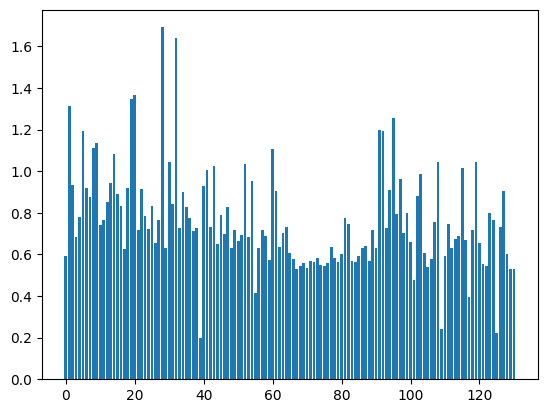

In [11]:
plt.bar(np.arange(len(percentfeatureList_RAV)),percentfeatureList_RAV)

NameError: name 'percentfeatureList_TESS' is not defined

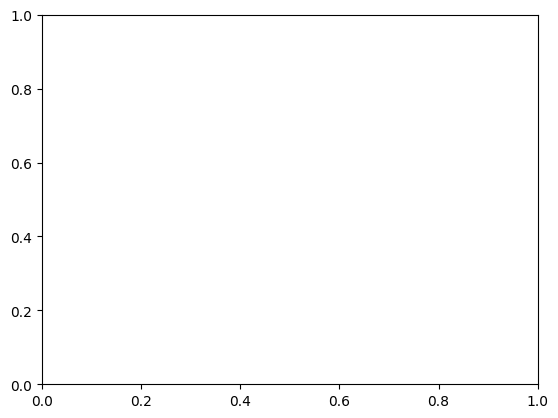

In [13]:
#Big Boi
plt.rcdefaults()
fig, ax = plt.subplots()

x_pos = [i for i, _ in enumerate(feat_labels)]

plt.barh(np.arange(len(percentfeatureList_TESS)), percentfeatureList_TESS, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - TESS")

plt.yticks(x_pos, feat_labels_mod)

plt.show()



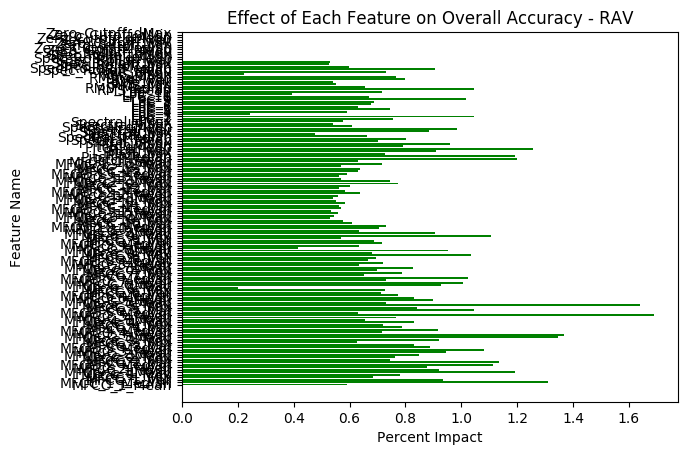

In [15]:
#Big Boi
plt.rcdefaults()
fig, ax = plt.subplots()

x_pos = [i for i, _ in enumerate(feat_labels)]

plt.barh(np.arange(len(percentfeatureList_RAV)), percentfeatureList_RAV, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - RAV")

plt.yticks(x_pos, feat_labels)

plt.show()



In [ ]:
#MFCCs
plt.rcdefaults()
fig, ax = plt.subplots()

MFCC_list = percentfeatureList_TESS[:91]
MFCC_label_list = feat_labels_mod[:91]

x_pos = [i for i, _ in enumerate(MFCC_label_list)]

plt.barh(np.arange(len(MFCC_list)), MFCC_list, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - TESS")

plt.yticks(x_pos, MFCC_label_list)

plt.show()

In [ ]:
len(percentfeatureList_TESS)

NameError: name 'percentfeatureList_TESS' is not defined

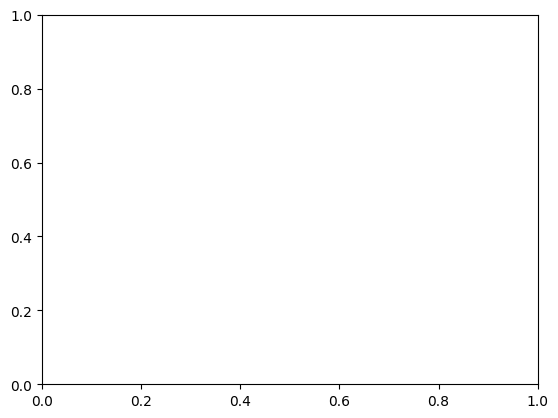

In [16]:
plt.rcdefaults()
fig, ax = plt.subplots()

MFCC_list = percentfeatureList_TESS[92:]
MFCC_label_list = feat_labels[92:]

x_pos = [i for i, _ in enumerate(MFCC_label_list)]

plt.barh(np.arange(len(MFCC_list)), MFCC_list, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - TESS")

plt.yticks(x_pos, MFCC_label_list)

plt.show()

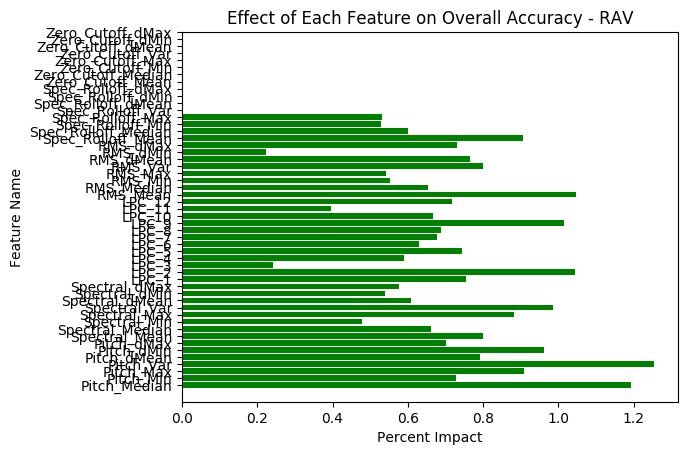

In [17]:
plt.rcdefaults()
fig, ax = plt.subplots()

MFCC_list = percentfeatureList_RAV[92:]
MFCC_label_list = feat_labels[92:]

x_pos = [i for i, _ in enumerate(MFCC_label_list)]

plt.barh(np.arange(len(MFCC_list)), MFCC_list, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - RAV")

plt.yticks(x_pos, MFCC_label_list)

plt.show()

In [ ]:
print(percentfeatureList_TESS[107:119])
print(featureList_TESS[107])

In [ ]:
#Prune out the LPCs

In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf_TESS, threshold=0.000935)

# Train the selector
sfm.fit(X_train_TESS, y_train_TESS)

In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_RAV = SelectFromModel(clf_RAV, threshold=0.000935)

# Train the selector
sfm_RAV.fit(X_train_RAV, y_train_RAV)

In [ ]:
# Print the names of the most important features
sum = 0
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])
    sum+= 1
    
sum

In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train_TESS = sfm.transform(X_train_TESS)
X_important_test_TESS = sfm.transform(X_test_TESS)

In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train_RAV = sfm.transform(X_train_RAV)
X_important_test_RAV = sfm.transform(X_test_RAV)

In [ ]:
# Create a new random forest classifier for the most important features
clf_important_TESS = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important_TESS.fit(X_important_train_TESS, y_train_TESS)

In [ ]:
# Create a new random forest classifier for the most important features
clf_important_RAV = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important_RAV.fit(X_important_train_RAV, y_train_RAV)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_pred_TESS = clf_TESS.predict(X_test_TESS)

# View The Accuracy Of Our Full Feature (4 Features) Model
print(accuracy_score(y_test_TESS, y_pred_TESS,  normalize = True) * 100, "%")

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_pred_RAV = clf_TESS.predict(X_test_RAV)

# View The Accuracy Of Our Full Feature (4 Features) Model
print(accuracy_score(y_test_RAV, y_pred_RAV,  normalize = True) * 100, "%")

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred_TESS = clf_important_TESS.predict(X_important_test_TESS)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test_TESS, y_important_pred_TESS)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred_RAV = clf_important_RAV.predict(X_important_test_RAV)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test_RAV, y_important_pred_RAV)

In [ ]:
def MLPalgorithm(X_train, X_test, y_train, y_test):
   mlp = MLPClassifier(max_iter=15000)
   mlp.fit(X_train,y_train)
   predictions = mlp.predict(X_train)
   print(classification_report(y_train,predictions))
   predictions = mlp.predict(X_test)
   print(classification_report(y_test,predictions))

In [ ]:
MLPalgorithm(X_train_TESS, X_test_TESS, y_train_TESS, y_test_TESS)

In [ ]:
def RandomForest(X_train, X_test, y_train, y_test):
    clf_important_TESS = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
    clf_important_TESS.fit(X_train, y_train)

    predictions = clf_important_TESS.predict(X_train)
    print(classification_report(y_train,predictions))
    predictions = clf_important_TESS.predict(X_test)
    print(classification_report(y_test,predictions))

In [ ]:
RandomForest(X_train_TESS, X_test_TESS, y_train_TESS, y_test_TESS)

In [ ]:
RandomForest(X_train_RAV, X_test_RAV, y_train_RAV, y_test_RAV)

In [ ]:

# Model Testing

In [ ]:
sfm = SelectFromModel(clf, threshold=0.005)

In [ ]:
sfm.fit(X_train, y_train)


In [ ]:
featureListP = []
for feature_list_index in sfm.get_support(indices=True):
    print(feature_list_index)